In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy

In [2]:
import sys
!{sys.executable} -m pip install openpyxl



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Daten einlesen
input_dir = './Data/Preparation/merged_typologien.xlsx'
df = pd.read_excel(input_dir)

In [4]:
df.head()

,Gemeinde,Gemeinde ID,Mittlere Wohnbevölkerung,Ständige Wohnbevölkerung Total,Ständige Wohnbevölkerung Ausländer-anteil in %,Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2,Ständige Wohnbevölkerung Anteil 0-19-Jährige in %,Ständige Wohnbevölkerung Anteil 20-64-Jährige in %,Ständige Wohnbevölkerung Anteil 65-Jährige und Ältere in %,Jahr,Gemeindetypologien
0,Kanton Luzern,NaN,328470,326275,11.9,218.5,25.5,60.9,13.5,1991,NaN
1,Adligenswil,1051.0,4330,4356,6.6,623.2,34.6,61.8,3.6,1991,Agglokern
2,Aesch,1021.0,896,912,6.6,157.2,29.5,61.3,9.2,1991,Land
3,Alberswil,1121.0,432,428,8.2,121.1,26.2,64.0,9.8,1991,Land
4,Altbüron,1122.0,739,749,4.1,111.0,29.1,59.5,11.3,1991,Land


In [5]:
#rows mit ganzem Kanton luzern löschen
indexNames = df[df['Gemeinde'] == 'Kanton Luzern'].index
indexNames

Int64Index([   0,   81,  162,  243,  324,  405,  486,  567,  648,  729,  810,
             891,  972, 1053, 1134, 1215, 1296, 1377, 1458, 1539, 1620, 1701,
            1782, 1863, 1944, 2025, 2106, 2187, 2268, 2349, 2430],
           dtype='int64')

In [6]:
df.drop(indexNames , axis=0, inplace=True)
df = df.reset_index()
df.drop('index',  axis=1, inplace=True)

In [7]:
df.head()

,Gemeinde,Gemeinde ID,Mittlere Wohnbevölkerung,Ständige Wohnbevölkerung Total,Ständige Wohnbevölkerung Ausländer-anteil in %,Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2,Ständige Wohnbevölkerung Anteil 0-19-Jährige in %,Ständige Wohnbevölkerung Anteil 20-64-Jährige in %,Ständige Wohnbevölkerung Anteil 65-Jährige und Ältere in %,Jahr,Gemeindetypologien
0,Adligenswil,1051.0,4330,4356,6.6,623.2,34.6,61.8,3.6,1991,Agglokern
1,Aesch,1021.0,896,912,6.6,157.2,29.5,61.3,9.2,1991,Land
2,Alberswil,1121.0,432,428,8.2,121.1,26.2,64.0,9.8,1991,Land
3,Altbüron,1122.0,739,749,4.1,111.0,29.1,59.5,11.3,1991,Land
4,Altishofen,1123.0,1541,1515,10.6,105.8,30.4,58.5,11.1,1991,Land


In [8]:
#df.drop('Gemeinde',  axis=1, inplace=True)

In [9]:
#Kategrien erstellen
df = pd.get_dummies(df, columns=['Gemeindetypologien', 'Gemeinde'])
df.shape

(2480, 94)

In [10]:
#manuelles splitting für die Jahre
1991 - 2018 #training
2019, 2020, 2021 #test

test = df[df['Jahr'] > 2018]
train = df[df['Jahr'] <= 2018]

In [11]:
train.head()

,Gemeinde ID,Mittlere Wohnbevölkerung,Ständige Wohnbevölkerung Total,Ständige Wohnbevölkerung Ausländer-anteil in %,Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2,Ständige Wohnbevölkerung Anteil 0-19-Jährige in %,Ständige Wohnbevölkerung Anteil 20-64-Jährige in %,Ständige Wohnbevölkerung Anteil 65-Jährige und Ältere in %,Jahr,Gemeindetypologien_Aggloguertel,...,Gemeinde_Udligenswil,Gemeinde_Ufhusen,Gemeinde_Vitznau,Gemeinde_Wauwil,Gemeinde_Weggis,Gemeinde_Werthenstein,Gemeinde_Wikon,Gemeinde_Willisau,Gemeinde_Wolhusen,Gemeinde_Zell
0,1051.0,4330,4356,6.6,623.2,34.6,61.8,3.6,1991,0,...,0,0,0,0,0,0,0,0,0,0
1,1021.0,896,912,6.6,157.2,29.5,61.3,9.2,1991,0,...,0,0,0,0,0,0,0,0,0,0
2,1121.0,432,428,8.2,121.1,26.2,64.0,9.8,1991,0,...,0,0,0,0,0,0,0,0,0,0
3,1122.0,739,749,4.1,111.0,29.1,59.5,11.3,1991,0,...,0,0,0,0,0,0,0,0,0,0
4,1123.0,1541,1515,10.6,105.8,30.4,58.5,11.1,1991,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
test.head()

,Gemeinde ID,Mittlere Wohnbevölkerung,Ständige Wohnbevölkerung Total,Ständige Wohnbevölkerung Ausländer-anteil in %,Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2,Ständige Wohnbevölkerung Anteil 0-19-Jährige in %,Ständige Wohnbevölkerung Anteil 20-64-Jährige in %,Ständige Wohnbevölkerung Anteil 65-Jährige und Ältere in %,Jahr,Gemeindetypologien_Aggloguertel,...,Gemeinde_Udligenswil,Gemeinde_Ufhusen,Gemeinde_Vitznau,Gemeinde_Wauwil,Gemeinde_Weggis,Gemeinde_Werthenstein,Gemeinde_Wikon,Gemeinde_Willisau,Gemeinde_Wolhusen,Gemeinde_Zell
2240,1051.0,5426,5460,11,781.2,21.7,55.1,23.3,2019,0,...,0,0,0,0,0,0,0,0,0,0
2241,1021.0,1253,1259,12.7,217.1,18.5,63.0,18.5,2019,0,...,0,0,0,0,0,0,0,0,0,0
2242,1121.0,661,659,12.9,186.4,19.6,69.3,11.1,2019,0,...,0,0,0,0,0,0,0,0,0,0
2243,1122.0,1009,1012,11,149.9,20.8,63.5,15.7,2019,0,...,0,0,0,0,0,0,0,0,0,0
2244,1123.0,1957,1959,15.6,136.8,24.9,62.6,12.5,2019,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
columns_drop = ['Mittlere Wohnbevölkerung',
                    'Gemeinde ID',
                    'Ständige Wohnbevölkerung Total',
                    'Ständige Wohnbevölkerung Anteil 0-19-Jährige in %',
                    'Ständige Wohnbevölkerung Anteil 20-64-Jährige in %',
                    'Ständige Wohnbevölkerung Anteil 65-Jährige und Ältere in %',
                    'Ständige Wohnbevölkerung Ausländer-anteil in %']

train = train.drop(columns_drop, axis=1)
test = test.drop(columns_drop, axis=1)


In [14]:
train.head()

,Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2,Jahr,Gemeindetypologien_Aggloguertel,Gemeindetypologien_Agglokern,Gemeindetypologien_Kern,Gemeindetypologien_Land,Gemeindetypologien_Stadt,Gemeinde_Adligenswil,Gemeinde_Aesch,Gemeinde_Alberswil,...,Gemeinde_Udligenswil,Gemeinde_Ufhusen,Gemeinde_Vitznau,Gemeinde_Wauwil,Gemeinde_Weggis,Gemeinde_Werthenstein,Gemeinde_Wikon,Gemeinde_Willisau,Gemeinde_Wolhusen,Gemeinde_Zell
0,623.2,1991,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,157.2,1991,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,121.1,1991,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,111.0,1991,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,105.8,1991,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
test.head()

,Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2,Jahr,Gemeindetypologien_Aggloguertel,Gemeindetypologien_Agglokern,Gemeindetypologien_Kern,Gemeindetypologien_Land,Gemeindetypologien_Stadt,Gemeinde_Adligenswil,Gemeinde_Aesch,Gemeinde_Alberswil,...,Gemeinde_Udligenswil,Gemeinde_Ufhusen,Gemeinde_Vitznau,Gemeinde_Wauwil,Gemeinde_Weggis,Gemeinde_Werthenstein,Gemeinde_Wikon,Gemeinde_Willisau,Gemeinde_Wolhusen,Gemeinde_Zell
2240,781.2,2019,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2241,217.1,2019,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2242,186.4,2019,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2243,149.9,2019,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2244,136.8,2019,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# für test, train split nicht nach jahren

In [17]:
X_train =  train.drop('Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2', axis=1)
y_train = train['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2']
X_test =  test.drop('Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2', axis=1)
y_test = test['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2']


In [18]:
#normalisierung
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
#model trainieren
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

R2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("R2:", R2)
print("mse:", mse)
print("mape:", mape)

R2: 0.9684906826297057
mse: 5413.930147639144
mape: 0.31117128832602964


In [22]:
X_train =  train.drop('Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2', axis=1)
y_train = train['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2']
X_test =  test.drop('Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2', axis=1)
y_test = test['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.svm import SVR

svr = SVR(C=100)
svr.fit(X_train, y_train)

svr_y_pred = model.predict(X_test)

R2 = r2_score(y_test, svr_y_pred)
mse = mean_squared_error(y_test, svr_y_pred)
mape = mean_absolute_percentage_error(y_test, svr_y_pred)
print("R2:", R2)
print("mse:", mse)
print("mape:", mape)

R2: 0.9684906826297057
mse: 5413.930147639144
mape: 0.31117128832602964


In [23]:
X_train =  train.drop('Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2', axis=1)
y_train = train['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2']
X_test =  test.drop('Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2', axis=1)
y_test = test['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2']

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1, include_bias=True)

x_train_poly_features = poly.fit_transform(X_train)
x_test_poly_features = poly.fit_transform(X_test)

from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train_poly_features, y_train)
poly_y_predicted = poly_reg_model.predict(x_test_poly_features)

R2 = r2_score(y_test, poly_y_predicted)
mse = mean_squared_error(y_test, poly_y_predicted)
mape = mean_absolute_percentage_error(y_test, poly_y_predicted)
print("R2:", R2)
print("mse:", mse)
print("mape:", mape)

R2: 0.9686813226378941
mse: 5381.174386048133
mape: 0.3045165223241316


In [24]:
X_train =  train.drop('Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2', axis=1)
y_train = train['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2']
X_test =  test.drop('Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2', axis=1)
y_test = test['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=8)

model.fit(X_train, y_train)

knr_y_pred = model.predict(X_test)

R2 = r2_score(y_test, knr_y_pred)
mse = mean_squared_error(y_test, knr_y_pred)
mape = mean_absolute_percentage_error(y_test, knr_y_pred)
print("R2:", R2)
print("mse:", mse)
print("mape:", mape)

R2: 0.9899021533612512
mse: 1735.0117649739582
mape: 0.06052698928690889


In [25]:
X_train =  train.drop('Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2', axis=1)
y_train = train['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2']
X_test =  test.drop('Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2', axis=1)
y_test = test['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

model.fit(X_train, y_train)

knr_y_pred = model.predict(X_test)

R2 = r2_score(y_test, knr_y_pred)
mse = mean_squared_error(y_test, knr_y_pred)
mape = mean_absolute_percentage_error(y_test, knr_y_pred)
print("R2:", R2)
print("mse:", mse)
print("mape:", mape)

R2: 0.9984660800810521
mse: 263.55808333333374
mape: 0.02311588875981038


In [26]:

X_train =  train.drop('Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2', axis=1)
y_train = train['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2']
X_test =  test.drop('Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2', axis=1)
y_test = test['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

model.fit(X_train, y_train)

knr_y_pred = model.predict(X_test)

R2 = r2_score(y_test, knr_y_pred)
mse = mean_squared_error(y_test, knr_y_pred)
mape = mean_absolute_percentage_error(y_test, knr_y_pred)
print("R2:", R2)
print("mse:", mse)
print("mape:", mape)

R2: 0.946244073873268
mse: 9236.341925520395
mape: 0.5182261765087467


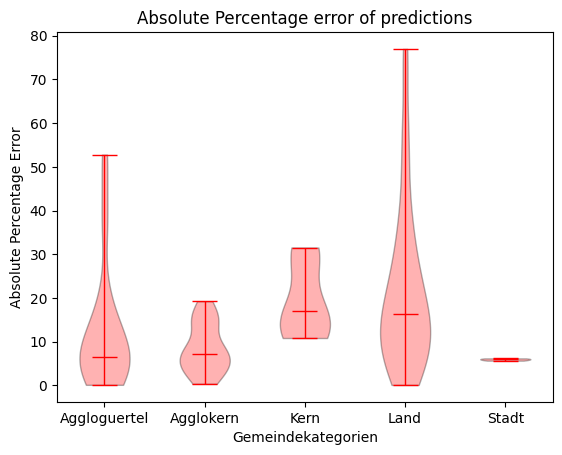

In [85]:
import matplotlib.pyplot as plt

test['Pred'] = poly_y_predicted

y_pred = test['Pred']
y = test['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2']
test['Delta'] = test['Pred'] - test['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2']

test['Delta_Percent'] = 100
test['Delta_Percent'] =  (abs(test['Delta']) / test['Pred'] ) * 100

test[test['Gemeindetypologien_Aggloguertel'] == 1][['Jahr', 'Delta_Percent']]

violin_parts = plt.violinplot(
    [
        test[test['Gemeindetypologien_Aggloguertel'] == 1]['Delta_Percent'],
        test[test['Gemeindetypologien_Agglokern'] == 1]['Delta_Percent'],
        test[test['Gemeindetypologien_Kern'] == 1]['Delta_Percent'],
        test[test['Gemeindetypologien_Land'] == 1]['Delta_Percent'],
        test[test['Gemeindetypologien_Stadt'] == 1]['Delta_Percent']

    ],
    showmeans=False,
    showmedians=True)

# add x-axis labels
plt.xticks([1, 2, 3, 4, 5], ['Aggloguertel', 'Agglokern', 'Kern', 'Land', 'Stadt'])

# add a title to the plot
plt.title("Absolute Percentage error of predictions")
plt.ylabel('Absolute Percentage Error')
plt.xlabel('Gemeindekategorien')

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_color('red')
    pc.set_edgecolor('black')

for partname in ('cbars','cmins','cmaxes','cmedians'):
    vp = violin_parts[partname]
    vp.set_edgecolor('red')
    vp.set_linewidth(1)

# display the plot
plt.show()
